In [1]:
%load_ext autoreload
%autoreload 2
from draw3d import *
from math import *
from random import random
from vectors import *
from draw2d import *

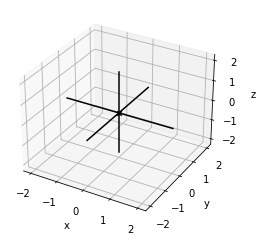

In [2]:
draw3d()

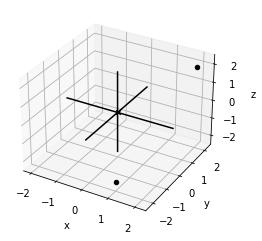

In [3]:
draw3d(
    Points3D((2,2,2),(1,-2,-2))
)

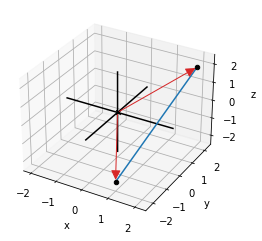

In [4]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2),(1,-2,-2))
)

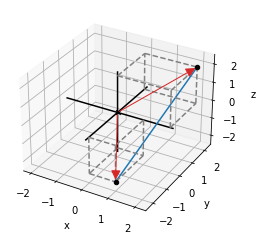

In [5]:
draw3d(
    Points3D((2,2,2),(1,-2,-2)),
    Arrow3D((2,2,2)),
    Arrow3D((1,-2,-2)),
    Segment3D((2,2,2),(1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

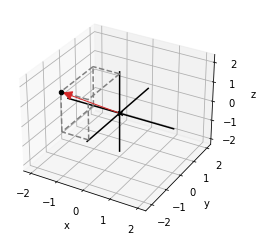

In [6]:
draw3d(
    Points3D((-1,-2,2)),
    Arrow3D((-1,-2,2)),
    Box3D(-1,-2,2)
)

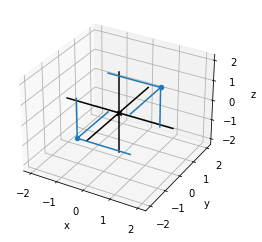

In [7]:
pm1=[1,-1]
verties=[(x,y,z) for x,y,z in zip(pm1,pm1,pm1)]
edges=[((-1,y,z),(1,y,z)) for y,z in zip(pm1,pm1)]+\
            [((x,-1,z),(x,1,z)) for x,z in zip(pm1,pm1)]+\
            [((x,y,-1),(x,y,1)) for x,y in zip(pm1,pm1)]
draw3d(
    Points3D(*verties,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [8]:
edges

[((-1, 1, 1), (1, 1, 1)),
 ((-1, -1, -1), (1, -1, -1)),
 ((1, -1, 1), (1, 1, 1)),
 ((-1, -1, -1), (-1, 1, -1)),
 ((1, 1, -1), (1, 1, 1)),
 ((-1, -1, -1), (-1, -1, 1))]

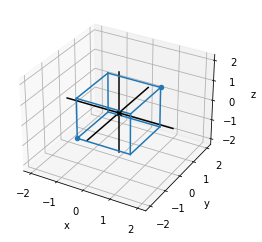

In [9]:
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
                [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
                [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]
draw3d(
    Points3D(*verties,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [10]:
edges

[((-1, 1, 1), (1, 1, 1)),
 ((-1, 1, -1), (1, 1, -1)),
 ((-1, -1, 1), (1, -1, 1)),
 ((-1, -1, -1), (1, -1, -1)),
 ((1, -1, 1), (1, 1, 1)),
 ((1, -1, -1), (1, 1, -1)),
 ((-1, -1, 1), (-1, 1, 1)),
 ((-1, -1, -1), (-1, 1, -1)),
 ((1, 1, -1), (1, 1, 1)),
 ((1, -1, -1), (1, -1, 1)),
 ((-1, 1, -1), (-1, 1, 1)),
 ((-1, -1, -1), (-1, -1, 1))]

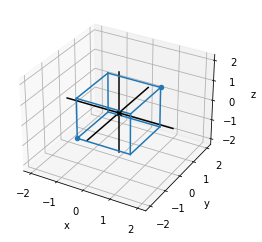

In [11]:
pm1=[1,-1]
verties=[(x,y,z) for x,y,z in zip(pm1,pm1,pm1)]
edges = [((-1,y,z),(1,y,z)) for y in pm1 for z in pm1] +\
                [((x,-1,z),(x,1,z)) for x in pm1 for z in pm1] +\
                [((x,y,-1),(x,y,1)) for x in pm1 for y in pm1]
draw3d(
    Points3D(*verties,color=blue),
    *[Segment3D(*edge) for edge in edges]
)

In [12]:
def add(*vectors):
    by_coordinate=zip(*vectors)
    coordinate_sums=[sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [13]:
list(zip(*[(1,1,3),(2,4,4),(4,2,-2)]))

[(1, 2, 4), (1, 4, 2), (3, 4, -2)]

In [14]:
[sum(coords) for coords in [(1, 2, 4), (1, 4, 2), (3, 4, -2)]]

[7, 7, 5]

In [15]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

In [16]:
add(*[(1, 2, 4), (1, 4, 2), (3, 4, -2)])

(5, 10, 4)

In [17]:
def length(v):
    return sqrt(sum(coord**2 for coord in v))
length((3,4,12))

13.0

In [18]:
def length(v):
    return sqrt(sum([coord**2 for coord in v]))

In [19]:
length((3,4,12))

13.0

In [20]:
length((3,4))

5.0

In [21]:
add((4,0,3),(-1,0,1))

(3, 0, 4)

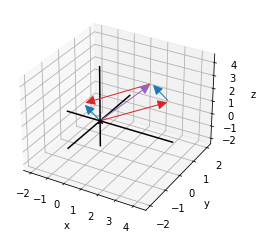

In [22]:
draw3d(Arrow3D((4,0,3),color=red),
    Arrow3D((-1,0,1),color=blue),
    Arrow3D((3,0,4),(4,0,3),color=blue),

    Arrow3D((-1,0,1),(3,0,4),color=red),
    Arrow3D((3,0,4),color=purple),
)

In [23]:
vectors1=[(1,2,3,4,5),(6,7,8,9,10)]
vectors2=[(1,2),(3,4),(5,6)]
print(list(zip(*vectors1)))
print(list(zip(*vectors2)))

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
[(1, 3, 5), (2, 4, 6)]


(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


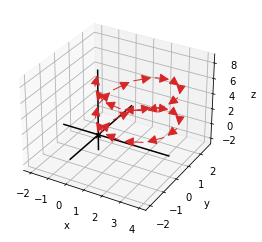

In [24]:
vs=[(sin(pi*t/6),cos(pi*t/6),1.0/3) for t in range(0,24)]
running_sum=(0,0,0)
arrows=[]
for v in vs:
    next_sum=add(running_sum,v)
    arrows.append(Arrow3D(next_sum,running_sum))
    running_sum=next_sum
print(running_sum)
draw3d(*arrows)

In [25]:
def scale(scalar,v):
    return tuple(scalar * coord for coord in v)

In [26]:
def vectors_with_whole_number_length(max_coord=100):
    for x in range(1,max_coord):
        for y in range(1,x+1):
            for z in range(1,y+1):
                if length((x,y,z)).is_integer():
                    yield (x,y,z)
vectors=list(vectors_with_whole_number_length())
print(vectors[0])
print(vectors[-1])

(2, 2, 1)
(99, 90, 70)


In [27]:
length((-1,-1,2))

2.449489742783178

In [28]:
s=1/length((-1,-1,2))
scale(s,(-1,-1,2))

(-0.4082482904638631, -0.4082482904638631, 0.8164965809277261)

In [29]:
length(scale(s,(-1,-1,2)))

1.0

In [30]:
def dot(u,v):
    return sum([coord1*coord2 for coord1,coord2 in zip(u,v)])

In [31]:
dot((1,2,-1),(3,0,3))

0

In [32]:
dot((2,3),(4,5))

23

In [33]:
dot((1,0),(0,2))

0

In [34]:
dot((0,3,0),(0,0,-5))

0

In [35]:
dot((3,4),(6,8))

50

In [36]:
dot(scale(2,(3,4)),(2,3))

36

In [37]:
dot((3,4),scale(2,(2,3)))

36

In [38]:
dot((4,3),(8,6))

50

In [39]:
3*2*cos(75*pi/180)

1.5529142706151244

In [40]:
def angle_between(v1,v2):
    return acos(
        dot(v1,v2)/(length(v1)*length(v2))
    )

In [41]:
dot((3,0),(7,0))

21

In [42]:
dot((0,3),(0,-7))

-21

In [43]:
def random_vector_length(l):
    return to_cartesian((l,2*pi*random()))
pairs=[(random_vector_length(3),random_vector_length(7)) for i in range(0,3)]
for u,v in pairs:
    print("u=%s,v=%s"%(u,v))
    print("length of u:%f,length of v:%f,dot product:%f"%(length(u),length(v),dot(u,v)))

u=(0.3466086110501086, 2.979909809163008),v=(6.2757877758775145, -3.1007237529561316)
length of u:3.000000,length of v:7.000000,dot product:-7.064635
u=(2.585187869887075, -1.522105015230134),v=(-0.6884556354539317, 6.96606264958992)
length of u:3.000000,length of v:7.000000,dot product:-12.382866
u=(0.30393738044964086, 2.9845639662713563),v=(-3.530834755281869, -6.044270504444157)
length of u:3.000000,length of v:7.000000,dot product:-19.112665


In [44]:
3.61*1.44*cos(101.3*pi/180)

-1.0186064362303022

In [45]:
r1,t1=to_polar((4,3))
r2,t2=to_polar((3,4))
t1-t2

-0.2837941092083278

In [46]:
t2-t1

0.2837941092083278

In [47]:
def cross(u,v):
    ux,uy,uz=u
    vx,vy,vz=v
    return (uy*vz-uz*vy,uz*vx-ux*vz,ux*vy-uy*vx)

In [48]:
cross((0,0,1),(1,2,3))

(-2, 1, 0)

In [49]:
cross((0,0,1),(-1,-1,0))

(1, -1, 0)

In [50]:
cross((0,0,1),(1,-1,5))

(1, 1, 0)

In [51]:
octahedron=[
    [(1,0,0),(0,1,0),(0,0,1)],
    [(1,0,0),(0,0,-1),(0,1,0)],
    [(1,0,0),(0,0,1),(0,-1,0)],
    [(1,0,0),(0,-1,0),(0,0,-1)],
    [(-1,0,0),(0,0,1),(0,1,0)],
    [(-1,0,0),(0,1,0),(0,0,-1)],
    [(-1,0,0),(0,-1,0),(0,0,1)],
    [(-1,0,0),(0,0,-1),(0,-1,0)],
]

In [52]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [53]:
def component(v,direction):
    return (dot(v,direction)/length(direction))

In [54]:
def vector_to_2d(v):
    return (component(v,(1,0,0)),component(v,(0,1,0)))

In [55]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [56]:
blues=matplotlib.cm.get_cmap('Blues')

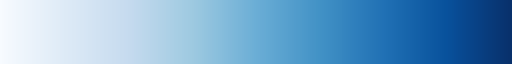

In [57]:
blues

In [58]:
def unit(v):
    return scale(1./length(v),v)

In [59]:
def normal(face):
    return (cross(subtract(face[1],face[0]),subtract(face[2],face[0])))

In [60]:
def render(faces,light=(1,2,3),color_map=blues,lines=None):
    polygons=[]
    for face in faces:
        unit_normal=unit(normal(face))
        if unit_normal[2]>0:
            c=color_map(1-dot(unit(normal(face)),unit(light)))
            p=Polygon2D(*face_to_2d(face),fill=c,color=lines)
            polygons.append(p)
    draw2d(*polygons,axes=False,origin=False,grid=None)

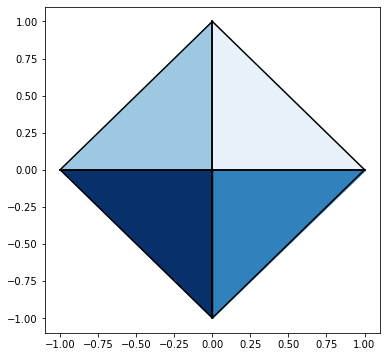

In [61]:
render(octahedron,color_map=matplotlib.cm.get_cmap('Blues'),lines=black)

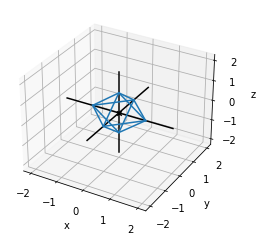

In [67]:
top=(0,0,1)
bottom=(0,0,-1)
xy_plane=[(1,0,0),(0,1,0),(-1,0,0),(0,-1,0)]
edges=[Segment3D(top,p) for p in xy_plane]+[Segment3D(bottom,p)
for p in xy_plane]+[Segment3D(xy_plane[i],xy_plane[(i+1)%4]) for i in range(0,4)]
draw3d(*edges)